In [5]:
import pandas as pd
from functions import process_datasets

### 入出力データセットの名称
## 入力データ
train_file = 'train.csv'
test_file = 'test.csv'

### データのインポート
df_train = pd.read_csv('original_data/' + train_file)
df_test = pd.read_csv('original_data/' + test_file)
original_datasets = [df_train, df_test]

### データ加工の実施
model_input_datasets = []
model_input_datasets.append(process_datasets.pattern_1(*original_datasets))
model_input_datasets.append(process_datasets.pattern_2(*original_datasets))
model_input_datasets.append(process_datasets.pattern_3(*original_datasets))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       168
           1       0.82      0.75      0.79       100

    accuracy                           0.85       268
   macro avg       0.84      0.83      0.83       268
weighted avg       0.85      0.85      0.85       268



<Axes: >

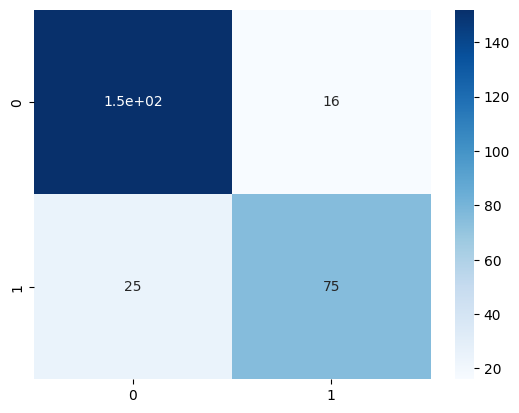

In [6]:
### ランダムフォレストを使った分析

## 定数の設定
i = 0
response_variable_name = 'Survived'

x_train_val = model_input_datasets[i][0]
y_train_val = model_input_datasets[i][1]
x_test = model_input_datasets[i][2]
id_test = model_input_datasets[i][3] # for submitting result

## ランダムフォレストのインスタンス作成
# sklearnからRandomForestClassiferモデルをインポート
from sklearn.ensemble import RandomForestClassifier as RFC
# モデルのインスタンスを作る
model = RFC(random_state=0)

## 学習
# データを指定の割合に分けるモジュール
from sklearn.model_selection import train_test_split
# データを学習用、検証用に分割する(乱数シードを0、検証データの割合を0.3に指定)
x_train,x_val,y_train,y_val = train_test_split(\
    x_train_val, y_train_val, test_size=0.3, random_state=0\
      )
# fitメソッドで学習((説明変数,目的変数)を指定する)
model.fit(x_train,y_train)

## 評価
# 検証用データで予測値を生成する
y_val_pred = model.predict(x_val)
# 検証用データで予測した結果のclassfication_reportを表示する
# 必要なモジュールをインポート
from sklearn.metrics import classification_report
# classfication_reportを表示
print(classification_report(y_val,y_val_pred))
# 混同行列を作成してseabornで表示する
# 必要なモジュールをインポート
from sklearn.metrics import confusion_matrix
import seaborn as sns
# 混同行列を表示
cm = confusion_matrix(y_val,y_val_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

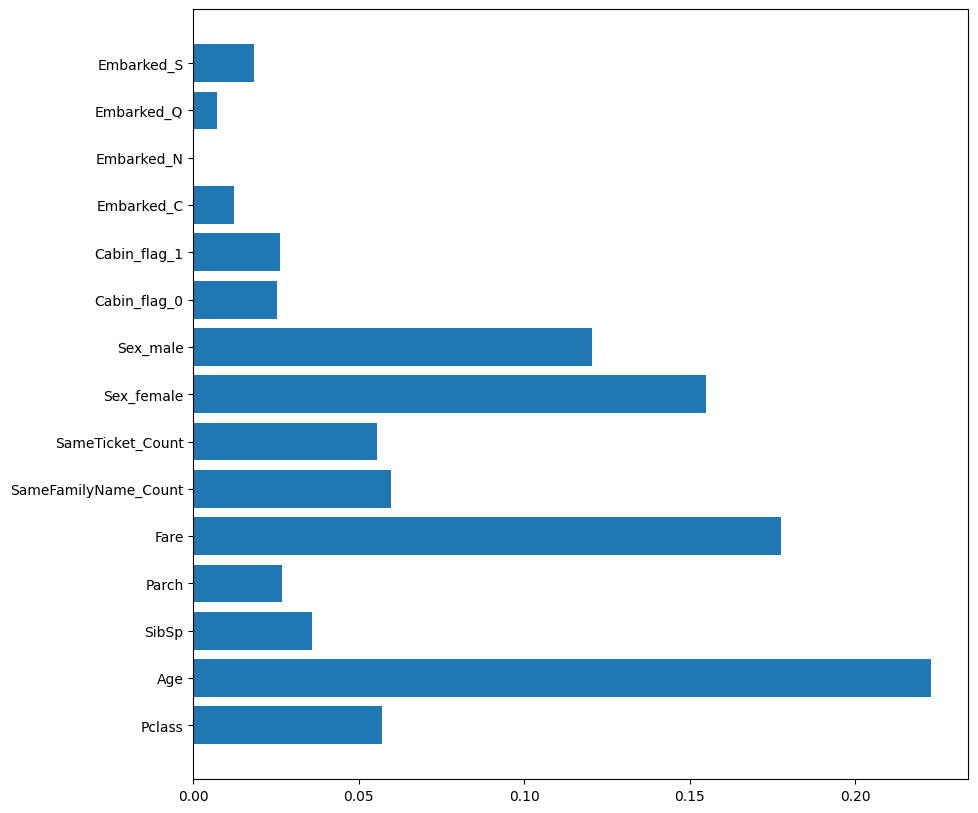

In [7]:
### 6. 解釈
# モデルの特徴量の重要度を図示する
import matplotlib.pyplot as plt
importances = model.feature_importances_
plt.figure(figsize=(10,10))
plt.barh(x_train_val.columns, importances)
plt.show()

In [ ]:
### 7. 予測の実行
y_test_pred = model.predict(x_test)
df_result = pd.concat([id_test, \
                       pd.DataFrame(y_test_pred, columns=[response_variable_name])], \
                        axis=1)

In [10]:
### 8. 結果の出力
result_file_name = 'outputs/' + 'result_' + str(i+1) + '.csv'
df_result.to_csv(result_file_name, index=False)